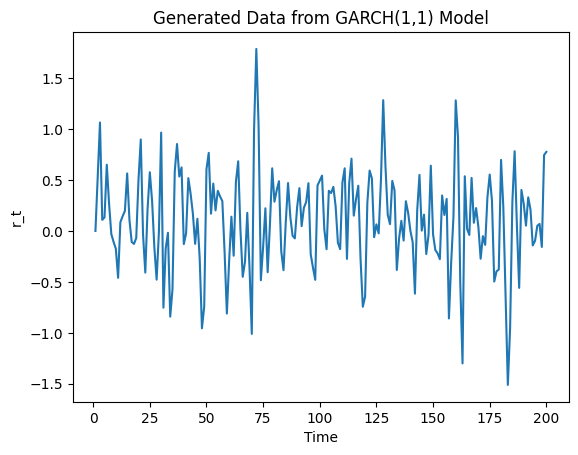

In [1]:
#1.(20%) Generate the first 200 data points from the following GARCH model

import numpy as np
import matplotlib.pyplot as plt

# Parameters
n = 200
r = np.zeros(n)
a = np.zeros(n)
sigma_squared = np.zeros(n)

# Initial values
r[0] = 0
r[1] = 0
sigma_squared[0] = 0.1

# Generating data
for t in range(1, n):
    a[t] = np.random.normal(0, 1)
    sigma_squared[t] = 0.1 + 0.12 * a[t-1]**2 + 0.09 * sigma_squared[t-1]
    r[t] = 0.1 + 0.3 * r[t-1] - 0.3 * r[t-2] + np.sqrt(sigma_squared[t]) * a[t]

# Plotting the data
plt.plot(np.arange(1, n+1), r)
plt.title('Generated Data from GARCH(1,1) Model')
plt.xlabel('Time')
plt.ylabel('r_t')
plt.show()

C:\Users\user\anaconda3\envs\v37\lib\site-packages\ipykernel_launcher.py:48: UserWarning: Glyph 28399 (\N{CJK UNIFIED IDEOGRAPH-6EEF}) missing from current font.
C:\Users\user\anaconda3\envs\v37\lib\site-packages\ipykernel_launcher.py:48: UserWarning: Glyph 24460 (\N{CJK UNIFIED IDEOGRAPH-5F8C}) missing from current font.
C:\Users\user\anaconda3\envs\v37\lib\site-packages\ipykernel_launcher.py:48: UserWarning: Glyph 25976 (\N{CJK UNIFIED IDEOGRAPH-6578}) missing from current font.
C:\Users\user\anaconda3\envs\v37\lib\site-packages\ipykernel_launcher.py:48: UserWarning: Glyph 33258 (\N{CJK UNIFIED IDEOGRAPH-81EA}) missing from current font.
C:\Users\user\anaconda3\envs\v37\lib\site-packages\ipykernel_launcher.py:48: UserWarning: Glyph 30456 (\N{CJK UNIFIED IDEOGRAPH-76F8}) missing from current font.
C:\Users\user\anaconda3\envs\v37\lib\site-packages\ipykernel_launcher.py:48: UserWarning: Glyph 38364 (\N{CJK UNIFIED IDEOGRAPH-95DC}) missing from current font.
C:\Users\user\anaconda3\envs

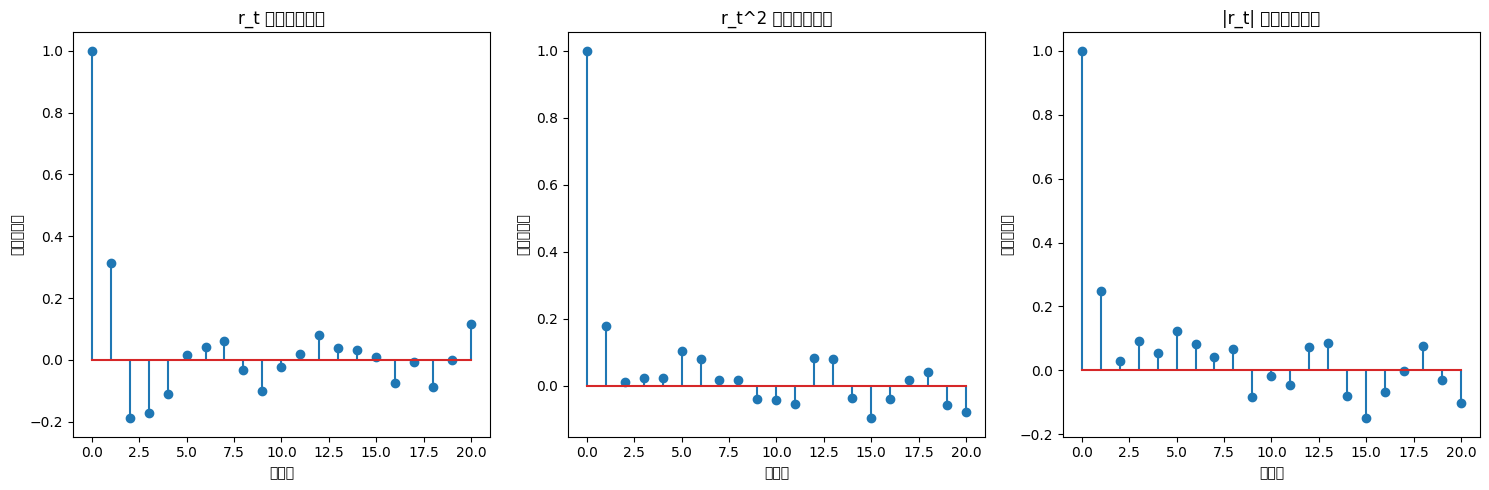

In [2]:
#2.(20%) Draw the ACF graphs for the simulated 𝑟_𝑡, 𝑟_𝑡^2, and 〖|𝑟〗_𝑡 |.

import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# 參數設定
n = 200
r = np.zeros(n)
a = np.zeros(n)
sigma_squared = np.zeros(n)

# 初始值設定
r[0] = 0
r[1] = 0
sigma_squared[0] = 0.1

# 產生數據
for t in range(1, n):
    a[t] = np.random.normal(0, 1)
    sigma_squared[t] = 0.1 + 0.12 * a[t-1]**2 + 0.09 * sigma_squared[t-1]
    r[t] = 0.1 + 0.3 * r[t-1] - 0.3 * r[t-2] + np.sqrt(sigma_squared[t]) * a[t]

# 計算自相關函數（ACF）
acf_r = sm.tsa.acf(r, nlags=20)
acf_r_squared = sm.tsa.acf(r**2, nlags=20)
acf_abs_r = sm.tsa.acf(np.abs(r), nlags=20)

# 繪製 ACF 圖表
plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.stem(acf_r)
plt.title('r_t 的自相關函數')
plt.xlabel('滯後數')
plt.ylabel('自相關係數')

plt.subplot(132)
plt.stem(acf_r_squared)
plt.title('r_t^2 的自相關函數')
plt.xlabel('滯後數')
plt.ylabel('自相關係數')

plt.subplot(133)
plt.stem(acf_abs_r)
plt.title('|r_t| 的自相關函數')
plt.xlabel('滯後數')
plt.ylabel('自相關係數')

plt.tight_layout()
plt.show()

In [11]:
#3.(20%) Suppose you know the mean function is in an ARMA(p,q) form, but you don’t know p and q. Fit the mean function.

import numpy as np
import pandas as pd
import statsmodels.api as sm

# Parameters
n = 200
r = np.zeros(n)
a = np.zeros(n)
sigma_squared = np.zeros(n)

# Initial values
r[0] = 0
r[1] = 0
sigma_squared[0] = 0.1

# Generating data
for t in range(1, n):
    a[t] = np.random.normal(0, 1)
    sigma_squared[t] = 0.1 + 0.12 * a[t-1]**2 + 0.09 * sigma_squared[t-1]
    r[t] = 0.1 + 0.3 * r[t-1] - 0.3 * r[t-2] + np.sqrt(sigma_squared[t]) * a[t]

# Calculate AIC for different ARMA models
results = []
for p in range(4):
    for q in range(4):
        try:
            model = sm.tsa.ARIMA(r, order=(p, 0, q))
            result = model.fit()
            results.append((p, q, result.aic))
        except:
            continue

# Convert results to DataFrame
results_df = pd.DataFrame(results, columns=['P', 'Q', 'AIC'])

# Print the AIC table
print(results_df)

best_p, best_q = 2, 0
arma_model = sm.tsa.ARIMA(r, order=(best_p, 0, best_q))
arma_result = arma_model.fit()

# 打印最佳模型的摘要信息
print("Best ARMA model order:", (best_p, 0, best_q))
print(arma_result.summary())

C:\Users\user\anaconda3\envs\v37\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\user\anaconda3\envs\v37\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


    P  Q         AIC
0   0  0  329.748862
1   0  1  315.519900
2   0  2  311.016466
3   0  3  311.827473
4   1  0  323.240204
5   1  1  313.816986
6   1  2  312.469687
7   1  3  312.876254
8   2  0  309.613846
9   2  1  310.683947
10  2  2  312.627051
11  2  3  312.208795
12  3  0  310.536158
13  3  1  311.900485
14  3  2  313.841310
15  3  3  314.196264
Best ARMA model order: (2, 0, 0)
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  200
Model:                 ARIMA(2, 0, 0)   Log Likelihood                -150.807
Date:                Sat, 04 May 2024   AIC                            309.614
Time:                        23:11:51   BIC                            322.807
Sample:                             0   HQIC                           314.953
                                - 200                                         
Covariance Type:                  opg                    

In [57]:
#4.(20%) Now, based on the mean function you obtained in 3., fit the GARCH model.
best_aic = np.inf
best_order = None
best_model = None
from arch import arch_model

# Try ARMA models with different orders
for p in range(3):
    for q in range(3):
        try:
            arma_model = sm.tsa.ARIMA(r, order=(p, 0, q))
            arma_result = arma_model.fit()
            if arma_result.aic < best_aic:
                best_aic = arma_result.aic
                best_order = (p, 0, q)
                best_model = arma_result
        except:
            continue

# Print summary of the best fitted ARMA model
print("Best ARMA model order:", best_order)
print(best_model.summary())

# Fit GARCH model to residuals of ARMA model
residuals = best_model.resid
garch_model = arch_model(residuals, vol='GARCH', p=2, q=0)
garch_result = garch_model.fit()
print(garch_result.summary())

Best ARMA model order: (2, 0, 0)
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  200
Model:                 ARIMA(2, 0, 0)   Log Likelihood                -150.807
Date:                Sun, 05 May 2024   AIC                            309.614
Time:                        01:32:46   BIC                            322.807
Sample:                             0   HQIC                           314.953
                                - 200                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1201      0.039      3.097      0.002       0.044       0.196
ar.L1          0.2594      0.052      4.942      0.000       0.157       0.362
ar.L2         -0.27

In [56]:
#5.(20%) Do a forecasting of 𝑟_𝑡 and 𝜎_𝑡^2 for t = 201 to 210.

# Parameters
forecast_steps = 10  # Number of steps to forecast
forecasted_r = arma_result.forecast(steps=forecast_steps)  # Forecasted mean values
forecasted_sigma2 = []  # Forecasted variance values

# Extend the length of sigma_squared array if necessary
required_length = n + forecast_steps
if len(sigma_squared) < required_length:
    extension_length = required_length - len(sigma_squared)
    sigma_squared = np.append(sigma_squared, np.zeros(extension_length))
    
if len(a) < required_length:
    extension_length_a = required_length - len(a)
    a_extension = np.random.normal(0, 1, extension_length_a)
    a = np.concatenate([a, a_extension])

# Calculate the forecasted variance values
for t in range(forecast_steps):
    sigma_squared[n + t] = 0.1 + 0.12 * a[n + t - 1]**2 + 0.09 * sigma_squared[n + t - 1]
    forecasted_sigma2.append(sigma_squared[n + t])

# Print the forecasted values
print("Forecasted values for r_t (t = 201 to 210):", forecasted_r)
print("\nForecasted values for sigma^2_t (t = 201 to 210):", forecasted_sigma2)

Forecasted values for r_t (t = 201 to 210): [0.17776392 0.21873932 0.12993213 0.09568685 0.11109327 0.12445654
 0.12370927 0.11986035 0.11906628 0.11991302]

Forecasted values for sigma^2_t (t = 201 to 210): [0.13756463452670806, 0.12402488618117034, 0.24040404078621225, 0.1351144958944326, 0.3607617247432648, 0.13365499096803787, 0.12234186509997869, 0.2666770814150855, 0.4486101862768653, 0.14416974299537444]
